In [7]:
import numpy as np
import igraph
from graspologic.plot import heatmap

In [2]:
import numpy as np

def ego_ind(graph_adj_matrix, order, node, mindist=1):
    #Note all nodes are zero based in this implementation, i.e the first node is 0
    dists = [[node]]
    for ii in range(1, order+1):
        clst = []
        for nn in dists[-1]:
            clst.extend(list(np.where(graph_adj_matrix[nn]==1)[0]))
        clst = list(set(clst))

        #Remove all the ones that are closer (i.e thtat have already been included)
        dists_conglom = []
        for dd in dists:
            dists_conglom.extend(dd)
        dists_conglom = list(set(dists_conglom))

        cn_proc = []
        for cn in clst:
            if cn not in dists_conglom:
                cn_proc.append(cn)

        dists.append(cn_proc)
    ress = []

    for ii in range(mindist, order+1):
        ress.extend(dists[ii])

    return list(set(ress))

def ego_list(graph_adj_matrix, order, node, mindist=1):
    total_res = []
    for nn in node:
        ego_res = ego_ind(graph_adj_matrix, order, node, mindist=mindist)
        total_res.extend(ego_res)
    return list(set(total_res))

def ego(graph_adj_matrix, order, node, mindist=1):
    if type(node) == list:
        return ego_list(graph_adj_matrix, order, node, mindist=mindist)
    elif type(node) == int:
        return ego_ind(graph_adj_matrix, order, node, mindist=mindist)
    else:
        print("Unsupported node datatype")
        return None

In [4]:
igraph_obj = igraph.load("HSfbgraphcore.txt", format="edges")
igraph_obj.to_undirected()

In [5]:
adj_mat_igraph = igraph_obj.get_adjacency()
adj_mat = np.array(adj_mat_igraph.data)

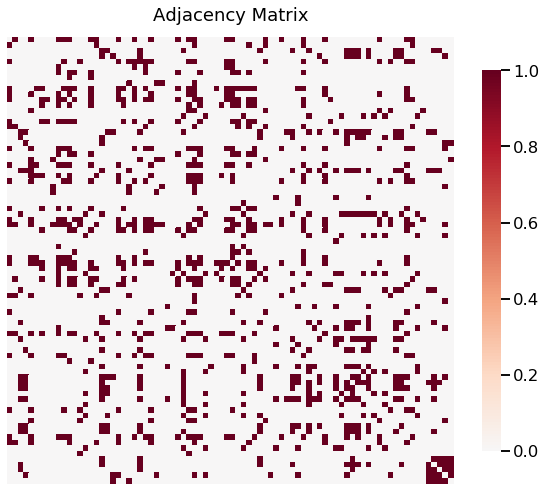

In [8]:
heatmap(adj_mat, title="Adjacency Matrix")

In [10]:
ego(adj_mat, 2, 30)

[9,
 14,
 29,
 32,
 36,
 38,
 43,
 46,
 49,
 52,
 53,
 55,
 56,
 60,
 61,
 62,
 63,
 65,
 66,
 67,
 69,
 71,
 75,
 80]